### Name: Gowtham thibhu T
### Register Number: 211722104048

# NNDL Assignment 4

#### Project Title: Text Generation Using Recurrent Neural Network

Project Link: https://gitlab.com/AravinthSS07/nndl-assignement/-/blob/main/assignment4.ipynb?ref_type=heads


Epoch 1, Loss: 0.42421872551237216
Epoch 1, Accuracy: 92.07%
Epoch 1, Loss: 0.17889400434964248
Epoch 2, Accuracy: 95.38%
Epoch 1, Loss: 0.12824609561829264
Epoch 3, Accuracy: 96.18%
Epoch 1, Loss: 0.10205778091855998
Epoch 4, Accuracy: 96.52%
Epoch 1, Loss: 0.08560721463720396
Epoch 5, Accuracy: 96.35%


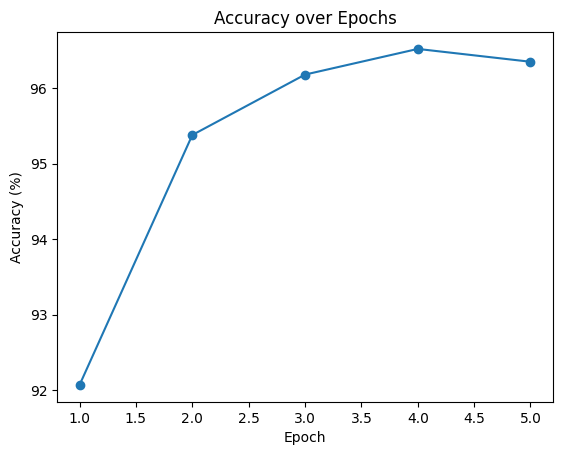

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# Evaluating the model
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Train and evaluate the model
epochs = 5
accuracy_list = []

for epoch in range(epochs):
    train(model, train_loader, criterion, optimizer, epochs=1)
    accuracy = evaluate(model, test_loader)
    accuracy_list.append(accuracy)
    print(f"Epoch {epoch+1}, Accuracy: {accuracy}%")

# Plotting the accuracy
plt.plot(range(1, epochs + 1), accuracy_list, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.show()